### Student Information
Name: 林奕杰

Student ID: 109020010

GitHub ID: yichiehqq

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# Second Part

## 2.I Data Preparation

In [1]:
### Begin Assignment Here
import pandas as pd
import numpy as np

filepath_dict = {'amazon': 'amazon_cells_labelled.txt',
                 'imdb': 'imdb_labelled.txt',
                 'yelp': 'yelp_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source
    df_list.append(df)

df_unshuffled = pd.concat(df_list)


# shuffel 
seed = 10
df = df_unshuffled.sample(frac=1, random_state=seed)
# Reset the index
df.reset_index(drop=True, inplace=True)

print(type(df))
print(df_unshuffled.shape)
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
(2748, 3)
(2748, 3)


In [2]:
print(df[:10])

                                            sentence  label  source
0                          Waitress was good though!      1    yelp
1   Otherwise, easy to install and use, clear sound.      1  amazon
2  The bottowm line...another worthless, cheap gi...      0  amazon
3  It came free with a DVD player I bought but I ...      0    imdb
4                                  Great price also!      1  amazon
5                                 Avoid at all cost!      0    yelp
6  How this piece of trash was ever released is b...      0    imdb
7  But this understated film leaves a lasting imp...      1    imdb
8  Maybe there would be a reasonable explanation ...      0    imdb
9  If you look for authentic Thai food, go else w...      0    yelp


### ** >>> Exercise 1: **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [3]:
for i in range(3):
    print(df.sentence[i])

Waitress was good though!
Otherwise, easy to install and use, clear sound.
The bottowm line...another worthless, cheap gimmick from Sprint.


## 2.II Data Transformation

In [4]:
import pandas as pd

for t in df["sentence"][:3]:
    print(t)

Waitress was good though!
Otherwise, easy to install and use, clear sound.
The bottowm line...another worthless, cheap gimmick from Sprint.


In [5]:
score = ['negative', 'postive']

In [6]:
df['score'] = df.label.apply(lambda label: 'positive' if label == 1 else 'negative')
df['source_num'] = df.source.apply(lambda source_num: 0 if source_num == 'amazon' else (1 if source_num == 'imdb' else 2))
df[:10]

sentence  label  source     score  \
0                          Waitress was good though!      1    yelp  positive   
1   Otherwise, easy to install and use, clear sound.      1  amazon  positive   
2  The bottowm line...another worthless, cheap gi...      0  amazon  negative   
3  It came free with a DVD player I bought but I ...      0    imdb  negative   
4                                  Great price also!      1  amazon  positive   
5                                 Avoid at all cost!      0    yelp  negative   
6  How this piece of trash was ever released is b...      0    imdb  negative   
7  But this understated film leaves a lasting imp...      1    imdb  positive   
8  Maybe there would be a reasonable explanation ...      0    imdb  negative   
9  If you look for authentic Thai food, go else w...      0    yelp  negative   

   source_num  
0           2  
1           0  
2           0  
3           1  
4           0  
5           2  
6           1  
7           1  
8           1  
9           2

In [7]:
df[-10:]

sentence  label  source  \
2738    There was NOTHING believable about it at all.        0    imdb   
2739  I didn't know pulled pork could be soooo delic...      1    yelp   
2740             Food was great and so was the serivce!      1    yelp   
2741  Top line: Don't waste your time and money on t...      0    imdb   
2742  Arrived quickly and much less expensive than o...      1  amazon   
2743  I have been in more than a few bars in Vegas, ...      0    yelp   
2744  This totally UNfunny movie is so over the top ...      0    imdb   
2745  While you don't yet hear Mickey speak, there a...      1    imdb   
2746                   The noise shield is incrediable.      1  amazon   
2747  Lifetime does not air it enough, so if anyone ...      1    imdb   

         score  source_num  
2738  negative           1  
2739  positive           2  
2740  positive           2  
2741  negative           1  
2742  positive           0  
2743  negative           2  
2744  negative           1  
2745  positive           1  
2746  positive           0  
2747  positive           1

In [8]:
df.loc[:10, 'sentence']

0                             Waitress was good though!
1      Otherwise, easy to install and use, clear sound.
2     The bottowm line...another worthless, cheap gi...
3     It came free with a DVD player I bought but I ...
4                                     Great price also!
5                                    Avoid at all cost!
6     How this piece of trash was ever released is b...
7     But this understated film leaves a lasting imp...
8     Maybe there would be a reasonable explanation ...
9     If you look for authentic Thai food, go else w...
10            The movie is terribly boring in places.  
Name: sentence, dtype: object

In [9]:
df.iloc[:10, 0]

0                            Waitress was good though!
1     Otherwise, easy to install and use, clear sound.
2    The bottowm line...another worthless, cheap gi...
3    It came free with a DVD player I bought but I ...
4                                    Great price also!
5                                   Avoid at all cost!
6    How this piece of trash was ever released is b...
7    But this understated film leaves a lasting imp...
8    Maybe there would be a reasonable explanation ...
9    If you look for authentic Thai food, go else w...
Name: sentence, dtype: object

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [10]:
#Answer here
print(type(df))

print(df['score'][:10] == "positive")
print(df.sort_index().loc[:10])
print(df.at[0, 'score'])
print(df.iat[0, 0])
print(df.where(df == '1', 'NA'))

<class 'pandas.core.frame.DataFrame'>
0     True
1     True
2    False
3    False
4     True
5    False
6    False
7     True
8    False
9    False
Name: score, dtype: bool
                                             sentence  label  source  \
0                           Waitress was good though!      1    yelp   
1    Otherwise, easy to install and use, clear sound.      1  amazon   
2   The bottowm line...another worthless, cheap gi...      0  amazon   
3   It came free with a DVD player I bought but I ...      0    imdb   
4                                   Great price also!      1  amazon   
5                                  Avoid at all cost!      0    yelp   
6   How this piece of trash was ever released is b...      0    imdb   
7   But this understated film leaves a lasting imp...      1    imdb   
8   Maybe there would be a reasonable explanation ...      0    imdb   
9   If you look for authentic Thai food, go else w...      0    yelp   
10          The movie is terribly b

### ** >>> Exercise 3 (5 min): **  
Try to fetch records belonging to the ```negative``` category, and query every 10th record. Only show the first 5 records.

In [11]:
df[df['score'] == "negative"].iloc[::10][0:5]

sentence  label  source  \
2   The bottowm line...another worthless, cheap gi...      0  amazon   
18  Every element of this story was so over the to...      0    imdb   
43  So I had to take the battery out of the phone ...      0  amazon   
67                                 I wouldn't return.      0    yelp   
84  This is so embarassing and also my ears hurt i...      0  amazon   

       score  source_num  
2   negative           0  
18  negative           1  
43  negative           0  
67  negative           2  
84  negative           0

## 2.III Missing Value

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [12]:
# check missing values
df.isnull()
missing_values_by_row = df.isnull().sum(axis=1)
missing_values_by_col = df.isnull().sum()
print(missing_values_by_row)
print(missing_values_by_col)

# there is no missing values in this dataset 
# we can set axis parameter = 1 so that the summation of missing values is calculated row by row

0       0
1       0
2       0
3       0
4       0
       ..
2743    0
2744    0
2745    0
2746    0
2747    0
Length: 2748, dtype: int64
sentence      0
label         0
source        0
score         0
source_num    0
dtype: int64


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [13]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [14]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [15]:

# Answer here

# We can observe that 'NaN,' 'None,' and an empty string ('') are not detected as missing values.

# While they may appear similar to NaN or None, but they are strings, which are not considered as null values. 



## 2.IV Duplicated Data

In [16]:
df.duplicated()
sum(df.duplicated())

sum(df.duplicated('sentence'))

# There are 17 duplicated data

17

In [17]:
print(df.shape)
df.drop_duplicates(keep='first', inplace=True) # inplace applies changes directly on our dataframe
print(df.shape)

# I choose to drop the duplicated data but keep first record remains
# As result, the shape of datafram is reduced by 17

(2748, 5)
(2731, 5)


## 2.V Data Preprocessing

In [18]:
print(df.shape)
df_sample = df.sample(n=1000,random_state=42) #random state
display(df_sample)

# Sampling 1000 records

(2731, 5)


sentence  label  source  \
1000  Only had this a month but it's worked flawless...      1  amazon   
2037  It feels poorly constructed, the menus are dif...      0  amazon   
1499                                Food was delicious!      1    yelp   
941   We've tried to like this place but after 10+ t...      0    yelp   
73    I mean really, how do you get so famous for yo...      0    yelp   
...                                                 ...    ...     ...   
1994                     The pleather case doesn't fit.      0  amazon   
1671                         Would recommend this item.      1  amazon   
2476  The phone takes FOREVER to charge like 2 to 5 ...      0  amazon   
2659  Even when the women finally show up, there is ...      0    imdb   
1917                         It was absolutely amazing.      1    yelp   

         score  source_num  
1000  positive           0  
2037  negative           0  
1499  positive           2  
941   negative           2  
73    negative           2  
...        ...         ...  
1994  negative           0  
1671  positive           0  
2476  negative           0  
2659  negative           1  
1917  positive           2  

[1000 rows x 5 columns]

In [19]:
df_sample[0:4]

sentence  label  source  \
1000  Only had this a month but it's worked flawless...      1  amazon   
2037  It feels poorly constructed, the menus are dif...      0  amazon   
1499                                Food was delicious!      1    yelp   
941   We've tried to like this place but after 10+ t...      0    yelp   

         score  source_num  
1000  positive           0  
2037  negative           0  
1499  positive           2  
941   negative           2

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [20]:
# 1. the size of X_sample dataframe is smallar than X.
print(df.shape)
print(df_sample.shape)

# 2. the order of data are different after sampling.
print(df[:10])
print(df_sample[:10])

# 3. the category distribution of X and X_sample are different.
print(df.source.value_counts())
print(df_sample.source.value_counts())


(2731, 5)
(1000, 5)
                                            sentence  label  source     score  \
0                          Waitress was good though!      1    yelp  positive   
1   Otherwise, easy to install and use, clear sound.      1  amazon  positive   
2  The bottowm line...another worthless, cheap gi...      0  amazon  negative   
3  It came free with a DVD player I bought but I ...      0    imdb  negative   
4                                  Great price also!      1  amazon  positive   
5                                 Avoid at all cost!      0    yelp  negative   
6  How this piece of trash was ever released is b...      0    imdb  negative   
7  But this understated film leaves a lasting imp...      1    imdb  positive   
8  Maybe there would be a reasonable explanation ...      0    imdb  negative   
9  If you look for authentic Thai food, go else w...      0    yelp  negative   

   source_num  
0           2  
1           0  
2           0  
3           1  
4       

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

source
yelp      996
amazon    990
imdb      745
Name: count, dtype: int64
996


<Axes: title={'center': 'source distribution'}, xlabel='source'>

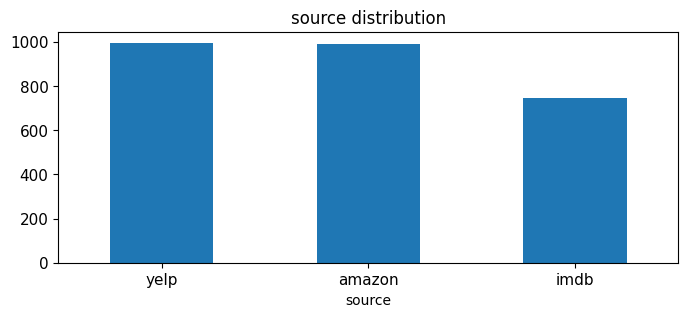

In [22]:
print(df.source.value_counts())

print(max(df.source.value_counts()))
upper_bound = max(df.source.value_counts() + 50) 

# plot barchart for X
df.source.value_counts().plot(kind = 'bar',
                                    title = 'source distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

source
amazon    369
yelp      352
imdb      279
Name: count, dtype: int64
369


<Axes: title={'center': 'source distribution'}, xlabel='source'>

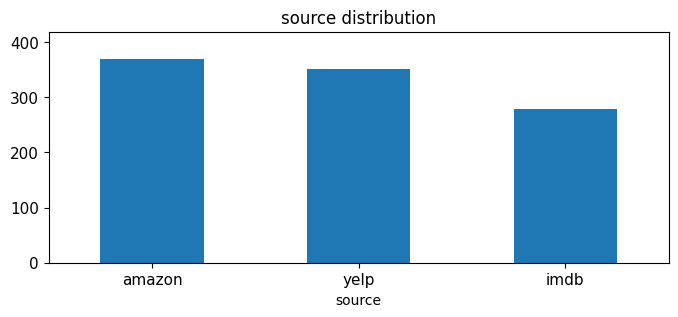

In [23]:
print(df_sample.source.value_counts())

print(max(df_sample.source.value_counts()))
upper_bound = max(df_sample.source.value_counts() + 50) 

# plot barchart for X
df_sample.source.value_counts().plot(kind = 'bar',
                                    title = 'source distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

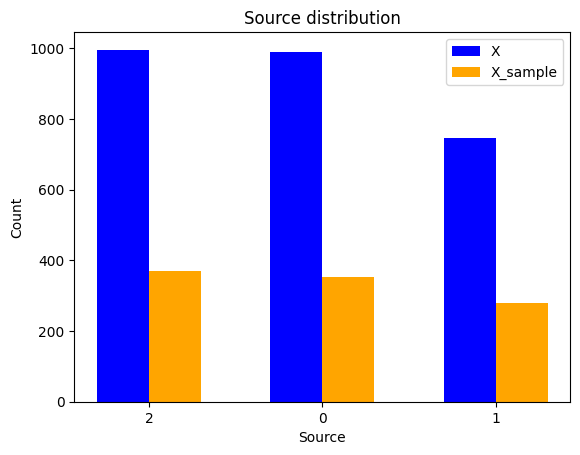

In [24]:
# Answer here

# Set the width of each bar
bar_width = 0.3

# Set the upper bound
upper_bound = max(df.source.value_counts()) + 50

# Create an index for the categories
index = range(len(df.source_num.value_counts()))

# Plot the distribution of X in blue
plt.bar(index, df.source_num.value_counts(), width=bar_width, color='blue', label='X')

# Plot the distribution of X_sample in orange, shifted to the right
plt.bar([i + bar_width for i in index], df_sample.source_num.value_counts(), width=bar_width, color='orange', label='X_sample')

# Set the x-axis labels
plt.xticks([i + bar_width / 2 for i in index], df.source_num.value_counts().index, rotation=0)

# Set the y-axis limit
plt.ylim([0, upper_bound])

# Set the title and labels
plt.title('Source distribution')
plt.xlabel('Source')
plt.ylabel('Count')

# Add a legend
plt.legend()

# Display the plot
plt.show()

## 2.VI Features Creation

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/yichiehqq/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# takes a like a minute or two to process
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

df['unigrams'] = df['sentence'].apply(lambda x: tokenize_text(x))
df[0:4]

sentence  label  source     score  \
0                          Waitress was good though!      1    yelp  positive   
1   Otherwise, easy to install and use, clear sound.      1  amazon  positive   
2  The bottowm line...another worthless, cheap gi...      0  amazon  negative   
3  It came free with a DVD player I bought but I ...      0    imdb  negative   

   source_num                                           unigrams  
0           2                   [Waitress, was, good, though, !]  
1           0  [Otherwise, ,, easy, to, install, and, use, ,,...  
2           0  [The, bottowm, line, ..., another, worthless, ...  
3           1  [It, came, free, with, a, DVD, player, I, boug...

In [27]:
list(df[0:1]['unigrams'])

[['Waitress', 'was', 'good', 'though', '!']]

# 2.VII Feature Subset Selection

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence) #learn the vocabulary and return document-term matrix
print(df_counts.shape)
print(df_counts[0])

print(count_vect.get_feature_names_out()[4945])
print(count_vect.get_feature_names_out()[4968])
print(count_vect.get_feature_names_out()[1993])
print(count_vect.get_feature_names_out()[4564])

(2731, 5155)
  (0, 4945)	1
  (0, 4968)	1
  (0, 1993)	1
  (0, 4564)	1
waitress
was
good
though


In [29]:
analyze = count_vect.build_analyzer()
analyze(df.sentence[0])

['waitress', 'was', 'good', 'though']

In [30]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [31]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
print(df.sentence[0])
analyze = count_vect.build_analyzer()
analyze(df.sentence[0])

Waitress was good though!


['waitress', 'was', 'good', 'though']

In [32]:
print(analyze(" ".join(list(df[:1].sentence))))

['waitress', 'was', 'good', 'though']


In [33]:
# We can check the shape of this matrix by:
df_counts.shape

(2731, 5155)

In [34]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [35]:
# we convert from sparse array to normal array
df_counts[15:20, 300:400].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [36]:
# Answer here
num_rows, num_cols = df_counts.shape

arr = df_counts[15:20, 300:400].toarray()
# print(arr)

for col in range(len(arr[1])):
    if arr[1][col] != 0:
        print(f"the index of '1' is {col}")
        print(count_vect.get_feature_names_out()[300 + col: 300 + col+1])
        break

# the first 1 in the same record represents 'bad', which means the sentence contains exactly one 'bad' term.

the index of '1' is 73
['bad']


In [37]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[360:380]]
print(plot_x)

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[10:30]]
print(plot_y)

plot_z = df_counts[10:30, 360:380].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

['term_baaaaaad', 'term_baba', 'term_babbling', 'term_babie', 'term_baby', 'term_babysitting', 'term_bachi', 'term_back', 'term_backdrop', 'term_backed', 'term_background', 'term_backlight', 'term_bacon', 'term_bad', 'term_badly', 'term_bag', 'term_bagels', 'term_bailey', 'term_bakery', 'term_baklava']
['doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19', 'doc_20', 'doc_21', 'doc_22', 'doc_23', 'doc_24', 'doc_25', 'doc_26', 'doc_27', 'doc_28', 'doc_29']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 

term_baaaaaad  term_baba  term_babbling  term_babie  term_baby  \
doc_10              0          0              0           0          0   
doc_11              0          0              0           0          0   
doc_12              0          0              0           0          0   
doc_13              0          0              0           0          0   
doc_14              0          0              0           0          0   
doc_15              0          0              0           0          0   
doc_16              0          0              0           0          0   
doc_17              0          0              0           0          0   
doc_18              0          0              0           0          0   
doc_19              0          0              0           0          0   
doc_20              0          0              0           0          0   
doc_21              0          0              0           0          0   
doc_22              0          0              0           0          0   
doc_23              0          0              0           0          0   
doc_24              0          0              0           0          0   
doc_25              0          0              0           0          0   
doc_26              0          0              0           0          0   
doc_27              0          0              0           0          0   
doc_28              0          0              0           0          0   
doc_29              0          0              0           0          0   

        term_babysitting  term_bachi  term_back  term_backdrop  term_backed  \
doc_10                 0           0          0              0            0   
doc_11                 0           0          0              0            0   
doc_12                 0           0          0              0            0   
doc_13                 0           0          0              0            0   
doc_14                 0           0          0              0            0   
doc_15                 0           0          0              0            0   
doc_16                 0           0          0              0            0   
doc_17                 0           0          0              0            0   
doc_18                 0           0          0              0            0   
doc_19                 0           0          0              0            0   
doc_20                 0           0          0              0            0   
doc_21                 0           0          0              0            0   
doc_22                 0           0          0              0            0   
doc_23                 0           0          0              0            0   
doc_24                 0           0          0              0            0   
doc_25                 0           0          0              0            0   
doc_26                 0           0          0              0            0   
doc_27                 0           0          0              0            0   
doc_28                 0           0          0              0            0   
doc_29                 0           0          0              0            0   

        term_background  term_backlight  term_bacon  term_bad  term_badly  \
doc_10                0               0           0         0           0   
doc_11                0               0           0         0           0   
doc_12                0               0           0         0           0   
doc_13                0               0           0         0           0   
doc_14                0               0           0         0           0   
doc_15                0               0           0         0           0   
doc_16                0               0           0         1           0   
doc_17                0               0           0         0           0   
doc_18                0               0           0         0           0   
doc_19                0

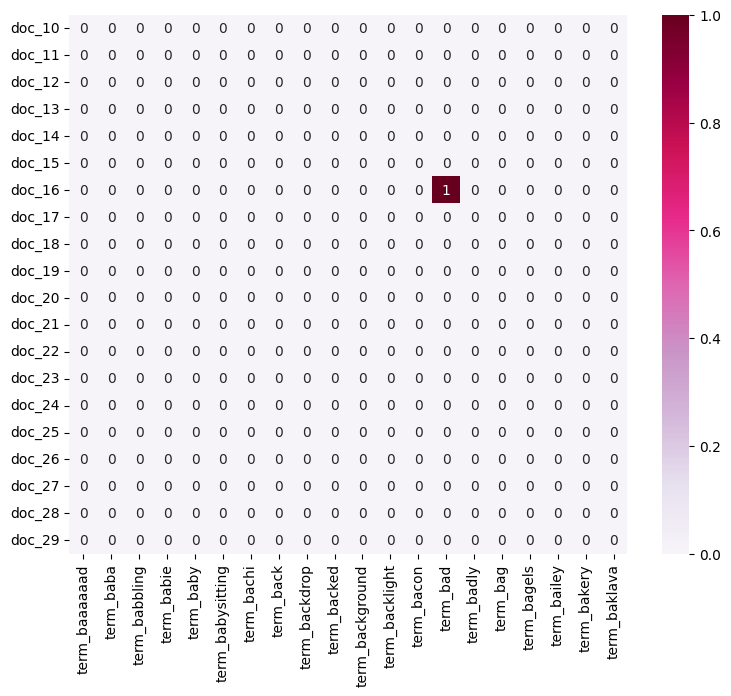

In [38]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

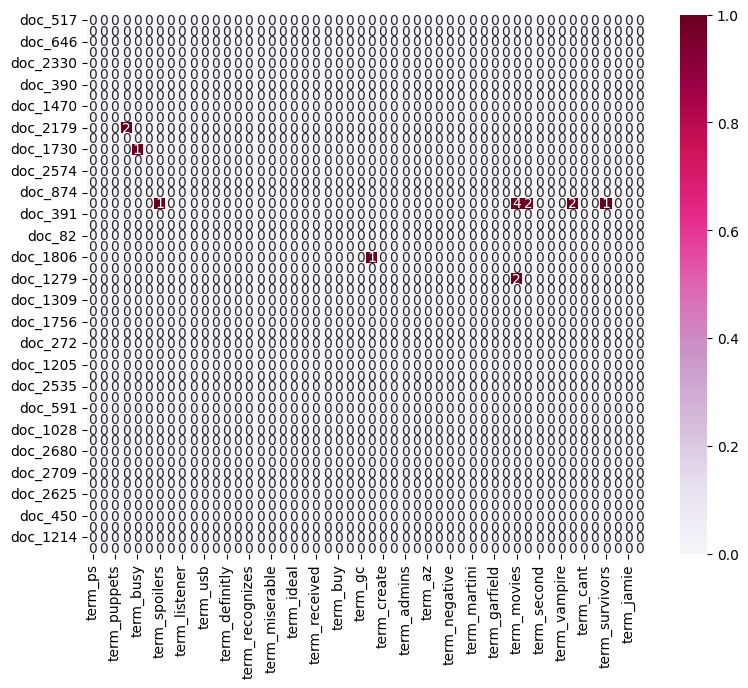

In [39]:
# Answer here
import seaborn as sns
import random

p_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()]
p_y = ["doc_"+ str(i) for i in list(df.index)]
p_z = df_counts.toarray()

# Sample size (e.g., 50 terms and 50 documents)
sample_size = 50

# Randomly select a sample from the term-document matrix
sample_rows = random.sample(p_y, sample_size)
sample_cols = random.sample(p_x, sample_size)

# Create a DataFrame with the sample data
df_todraw = pd.DataFrame(p_z, columns = p_x, index = p_y)
df_sample = df_todraw.loc[sample_rows, sample_cols]

plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_sample, cmap="PuRd", vmin=0, vmax=1, annot=True)
plt.show()

# Because the shape of df_counts is large, plotting all the data is not feasible and the matrix is sparse. 
# Therefore, I have opted to sample it at 50x50 to achieve better efficiency..


## 2.VII Dimensionality Reduction

In [40]:
from sklearn.decomposition import PCA

print(df_counts.shape)
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
print(df_reduced.shape)

(2731, 5155)
(2731, 2)


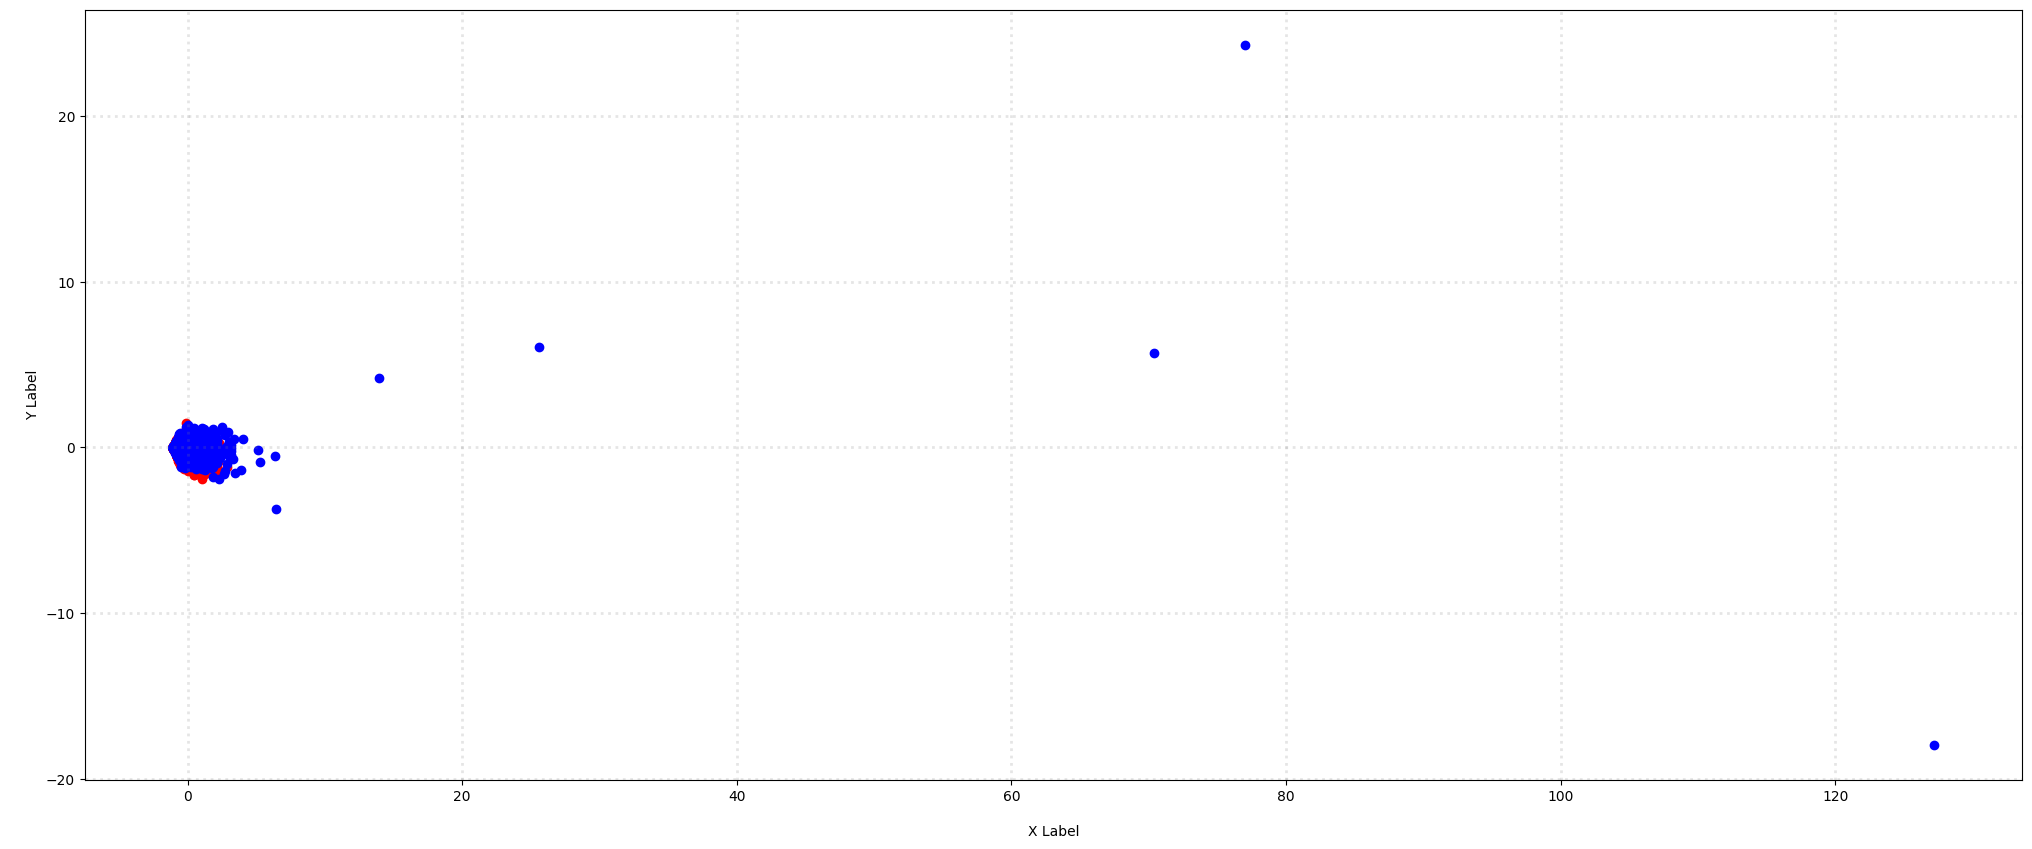

In [41]:
col = ['red', 'blue', 'green']

sources = {'amazom', 'imdb', 'yelp'}

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, source in zip(col, sources):
    xs = df_reduced[df['source'] == source].T[0]
    ys = df_reduced[df['source'] == source].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

(2731, 5155)


[[-0.90686802 -0.19273468 -0.02000697]
 [-0.64218149 -0.46665308 -0.53092645]
 [-0.33070613  0.13697154  0.6836627 ]
 ...
 [ 0.95686915 -0.47291434 -0.007026  ]
 [-0.18105595  0.32800725  0.71974304]
 [-0.00902653  1.34472172 -1.32974923]]


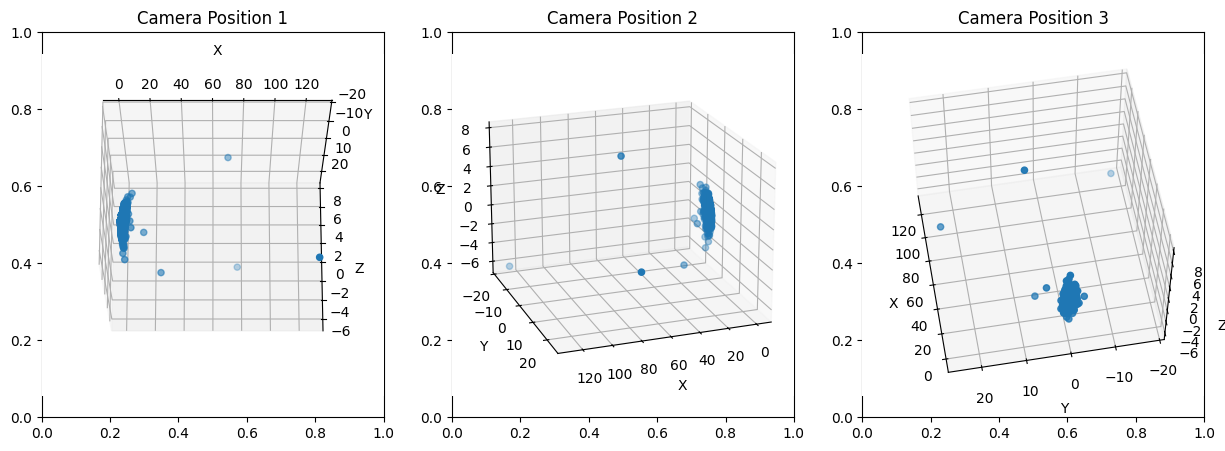

In [42]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D

print(df_counts.shape)
X_3d = PCA(n_components = 3).fit_transform(df_counts.toarray())
print(X_3d)

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create 3-D plots for each camera position
for i, (elev, azim) in enumerate([(-20, -90), (20, 70), (55, 170)]):
    ax = axes[i]
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    ax.view_init(elev=elev, azim=azim)
    
    # Plot your data in 3-D (replace the following line with your data)
    ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# Set titles for each subplot
axes[0].set_title('Camera Position 1')
axes[1].set_title('Camera Position 2')
axes[2].set_title('Camera Position 3')

plt.show()

# 1. most of the data points are concentrated around the origin, but there are still some outliers present."
# 2. There is a noticeable cluster within the distribution.

## 2.VIII Attribute Transformation/Aggregation

In [43]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(df_counts.shape[1])
for j in range(0, df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

5155


In [44]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term: 00

1

/tmp/ipykernel_1131234/3140323867.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


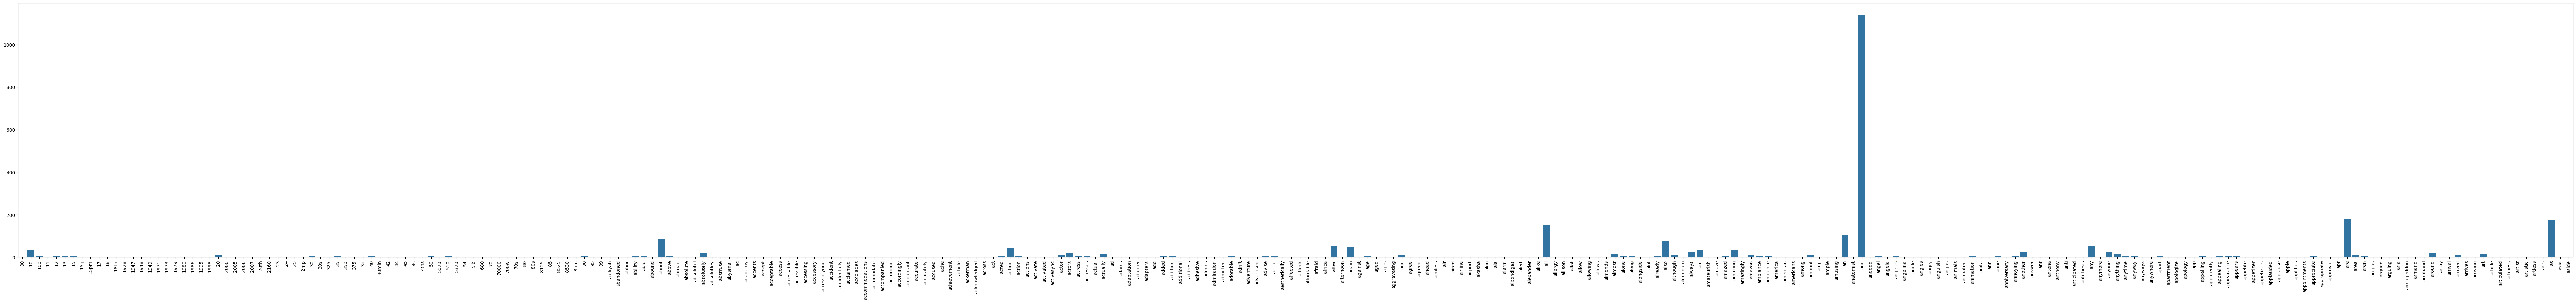

In [45]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [46]:
# Answer here
import plotly.express as px

# Create a DataFrame with the top 300 features and their frequencies
top_features_df = pd.DataFrame({
    'Feature': count_vect.get_feature_names_out()[:300],
    'Frequency': term_frequencies[:300]
})

# Create an interactive bar chart with Plotly
fig = px.bar(top_features_df, x='Feature', y='Frequency', title='300 Features',
             labels={'Frequency': 'Term Frequency'}, text='Frequency')

# Customize the layout
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Features', yaxis_title='Frequency')

# Show the interactive chart
fig.show()

# Using the Plotly module to make it more interactive.
# When the cursor over any bar, the corresponding features and frequency will be displayed.
# For convenience, only select the top30 highest frequency features.


### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [47]:
# Answer here
import plotly.express as px

# Create a DataFrame with the first 100 features and their frequencies
t100_features_df = pd.DataFrame({
    'Feature': count_vect.get_feature_names_out()[:100],
    'Frequency': term_frequencies[:100]
})

# Create an interactive bar chart with Plotly
fig = px.bar(t100_features_df, x='Feature', y='Frequency', title='100 Features',
             labels={'Frequency': 'Term Frequency'}, text='Frequency')

# Customize the layout
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Features', yaxis_title='Frequency')

# Show the interactive chart
fig.show()

# To make it computational efficient, substitue the 300 with 100 to reduce the size.

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [48]:
# Answer here
top_100_indices = np.argsort(term_frequencies)[::-1][:100]
top_100_features = [count_vect.get_feature_names_out()[i] for i in top_100_indices]
top_100_frequencies = term_frequencies[top_100_indices]

import plotly.express as px

# Assuming you have already sorted the top 100 features as shown in the previous response

data = pd.DataFrame({'Features': top_100_features, 'Frequencies': top_100_frequencies})

fig = px.bar(data, x='Features', y='Frequencies', text='Frequencies')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(
    title='Top 100 Features by Term Frequencies',
    xaxis_title='Features',
    yaxis_title='Frequencies'
)
fig.show()

# For convenience, select the top 100 highest frequency features
# Sort the features by its frequency
# Plot the diagram from the highest frequency to lowest frequency
# The diagram presents a long tail

In [49]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/tmp/ipykernel_1131234/1516414146.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


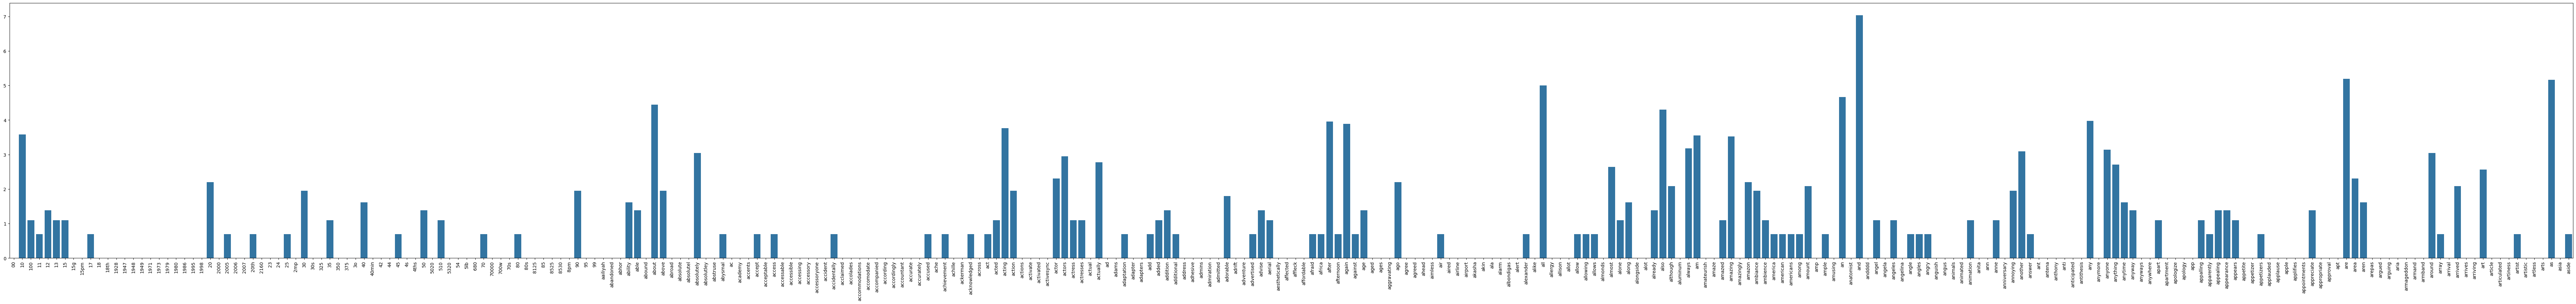

In [50]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

## 2.VIII Discretization and Binarization

In [51]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(df.source_num)

LabelBinarizer()

In [52]:
df['bin_source'] = mlb.transform(df['source_num']).tolist()

In [53]:
df[0:9]

sentence  label  source     score  \
0                          Waitress was good though!      1    yelp  positive   
1   Otherwise, easy to install and use, clear sound.      1  amazon  positive   
2  The bottowm line...another worthless, cheap gi...      0  amazon  negative   
3  It came free with a DVD player I bought but I ...      0    imdb  negative   
4                                  Great price also!      1  amazon  positive   
5                                 Avoid at all cost!      0    yelp  negative   
6  How this piece of trash was ever released is b...      0    imdb  negative   
7  But this understated film leaves a lasting imp...      1    imdb  positive   
8  Maybe there would be a reasonable explanation ...      0    imdb  negative   

   source_num                                           unigrams bin_source  
0           2                   [Waitress, was, good, though, !]  [0, 0, 1]  
1           0  [Otherwise, ,, easy, to, install, and, use, ,,...  [1, 0, 0]  
2           0  [The, bottowm, line, ..., another, worthless, ...  [1, 0, 0]  
3           1  [It, came, free, with, a, DVD, player, I, boug...  [0, 1, 0]  
4           0                            [Great, price, also, !]  [1, 0, 0]  
5           2                          [Avoid, at, all, cost, !]  [0, 0, 1]  
6           1  [How, this, piece, of, trash, was, ever, relea...  [0, 1, 0]  
7           1  [But, this, understated, film, leaves, a, last...  [0, 1, 0]  
8           1  [Maybe, there, would, be, a, reasonable, expla...  [0, 1, 0]

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [54]:
# Answer here
df['bin_source'] = mlb.transform(df['source_num']).tolist()
df[0:9]

# No, since the category name is of string type not numerical type

sentence  label  source     score  \
0                          Waitress was good though!      1    yelp  positive   
1   Otherwise, easy to install and use, clear sound.      1  amazon  positive   
2  The bottowm line...another worthless, cheap gi...      0  amazon  negative   
3  It came free with a DVD player I bought but I ...      0    imdb  negative   
4                                  Great price also!      1  amazon  positive   
5                                 Avoid at all cost!      0    yelp  negative   
6  How this piece of trash was ever released is b...      0    imdb  negative   
7  But this understated film leaves a lasting imp...      1    imdb  positive   
8  Maybe there would be a reasonable explanation ...      0    imdb  negative   

   source_num                                           unigrams bin_source  
0           2                   [Waitress, was, good, though, !]  [0, 0, 1]  
1           0  [Otherwise, ,, easy, to, install, and, use, ,,...  [1, 0, 0]  
2           0  [The, bottowm, line, ..., another, worthless, ...  [1, 0, 0]  
3           1  [It, came, free, with, a, DVD, player, I, boug...  [0, 1, 0]  
4           0                            [Great, price, also, !]  [1, 0, 0]  
5           2                          [Avoid, at, all, cost, !]  [0, 0, 1]  
6           1  [How, this, piece, of, trash, was, ever, relea...  [0, 1, 0]  
7           1  [But, this, understated, film, leaves, a, last...  [0, 1, 0]  
8           1  [Maybe, there, would, be, a, reasonable, expla...  [0, 1, 0]

# 2.IX Data Exploration

In [55]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[10]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[20]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[30]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [56]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['The movie is terribly boring in places.  ']
['However Paul Schrader has indeed made a film "about" Mishima that is both superb & complex.  ']
[') some great music, and terrific scenery.  ']


In [57]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [58]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.101015
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/tmp/ipykernel_1131234/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_1131234/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_1131234/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_1131234/452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before p

# Part 3


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


## 3.I Data Visualization

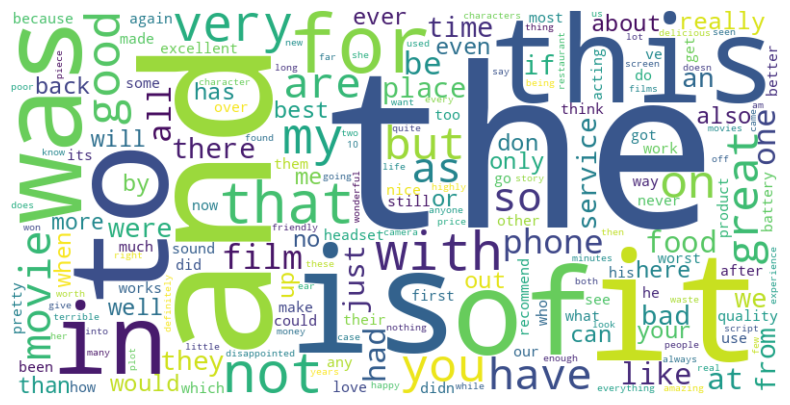

In [59]:
from wordcloud import WordCloud
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
term_freq = {}
# print(df_counts.shape[1])
for j in range(0, df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

for i in range(len(count_vect.get_feature_names_out())):
    term_freq[count_vect.get_feature_names_out()[i]] = term_frequencies[i]

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud from the term frequencies
wordcloud.generate_from_frequencies(term_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# I visualized the data using a word cloud, where words with higher frequency are displayed in a larger size, 
# while less frequent words are shown in a smaller size."


  (0, 4564)	0.5980601388408237
  (0, 1993)	0.3568240559351443
  (0, 4968)	0.27614670472237907
  (0, 4945)	0.6623772798840997
  (1, 4201)	0.3169002000134063
  (1, 845)	0.39434932175826076
  (1, 4839)	0.3156041290201424
  (1, 216)	0.1337810345702611
  (1, 2369)	0.49117740871676374
  (1, 4609)	0.16605624329889992
  (1, 1459)	0.365938795123157
  (1, 3161)	0.4730945144963791
  (2, 4252)	0.38656064055736455
  (2, 1883)	0.22441715573350712
  (2, 1962)	0.42216066727857643
  (2, 780)	0.3093112525229925
  (2, 5104)	0.3750999917770656
  (2, 235)	0.3038999383346419
  (2, 2648)	0.3260249411537317
  (2, 556)	0.42216066727857643
  (2, 4531)	0.09352894657584147
  (3, 2242)	0.3177880020052816
  (3, 1829)	0.12484777502804456
  (3, 1504)	0.3177880020052816
  (3, 427)	0.19108695202097456
  :	:
  (2729, 4031)	0.5790559913039841
  (2729, 3049)	0.5302252726669573
  (2729, 2427)	0.1783015841853453
  (2729, 4531)	0.128288827152514
  (2730, 3965)	0.3178994344085252
  (2730, 2631)	0.3178994344085252
  (2730, 253

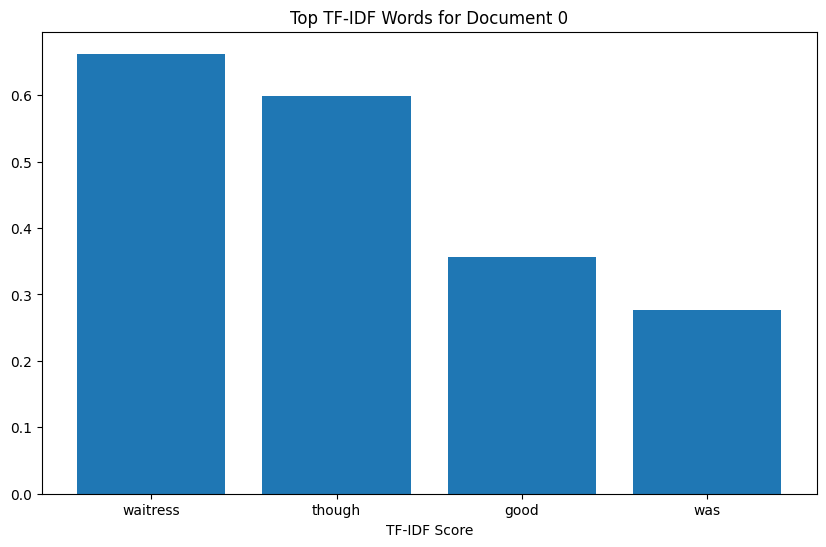

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import numpy as np
from scipy.sparse import csr_matrix

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df.sentence)  

# we now have a TF-IDF matrix where each row corresponds to a document, and each column corresponds to a token. 
# The values in this matrix represent the TF-IDF scores.

print(X_tfidf)

# Higher TF-IDF values indicate that a token is more important in a specific document compared to the entire corpus. 
# We can use TF-IDF values to identify important terms in documents, perform text classification, or even perform clustering.

# Assuming X_tfidf is your CSR matrix
X_dense = X_tfidf.toarray()

# Sort the indices based on TF-IDF scores for a specific document (e.g., document 0)
sorted_indices = np.argsort(-X_dense[0])  # The minus sign sorts in descending order

# Display the top N tokens with their TF-IDF scores
N = 4
top_tokens = [tfidf_vectorizer.get_feature_names_out()[i] for i in sorted_indices[:N]]
top_scores = [X_dense[0][i] for i in sorted_indices[:N]]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_tokens, top_scores)
plt.xlabel('TF-IDF Score')
plt.title('Top TF-IDF Words for Document 0')
plt.show()


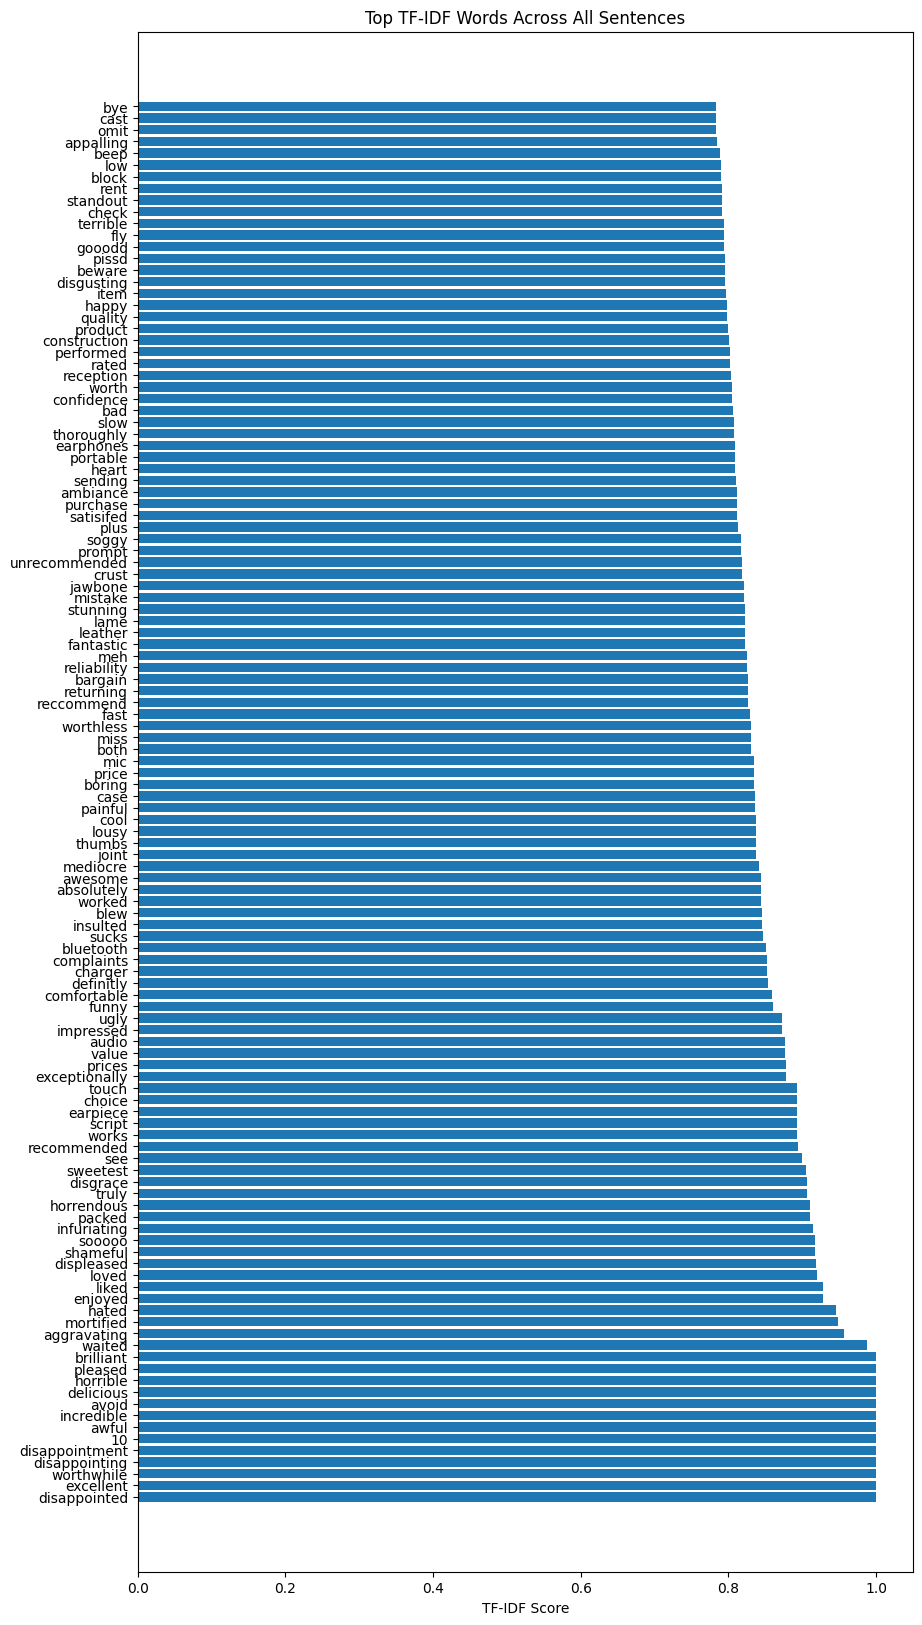

In [61]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF vectorizer
tfidf_vect = TfidfVectorizer()

# Compute TF-IDF scores for all sentences
tfidf_matrix = tfidf_vect.fit_transform(df.sentence)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Flatten the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

# Sort the DataFrame by TF-IDF scores across all sentences
sorted_tfidf_df = tfidf_df.max(axis=0).sort_values(ascending=False)

# Plot the sorted TF-IDF scores

N = 120
top_words = sorted_tfidf_df.index[:N]  # Choose the top N words to plot
top_scores = sorted_tfidf_df[:N]

plt.figure(figsize=(10, 20))
plt.barh(top_words, top_scores)
plt.xlabel('TF-IDF Score')
plt.title('Top TF-IDF Words Across All Sentences')
plt.show()


## 3.III **Naive Bayes classifier**
Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

### Word Frequency Classifier

Accuracy: 0.8007312614259597
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79       252
           1       0.84      0.78      0.81       295

    accuracy                           0.80       547
   macro avg       0.80      0.80      0.80       547
weighted avg       0.80      0.80      0.80       547



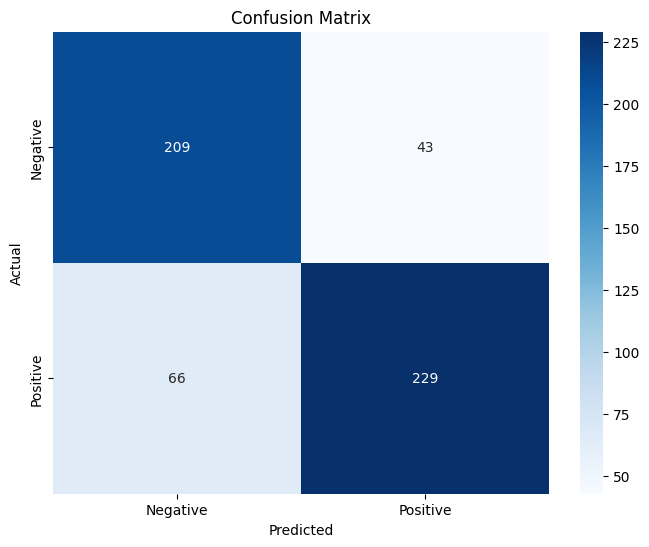

In [62]:
# Word Freqeucy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.sentence)
Y = df.label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



### Analysis
Precision: Precision is a measure of how many of the predicted positive instances were actually correct

$\text{F1-Score} = \frac{2 \cdot \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$

Recall, also known as "sensitivity" or "true positive rate," measures how many of the actual positive instances were correctly predicted.

$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a classifier's performance, especially when there is an imbalance between positive and negative classes. The formula for the F1-score is:

$F1-Score = \frac{2 \cdot (Precision \times Recall)}{Precision + Recall}$

The accuracy of the "word frequency classifier" is 0.8

The word frequency classifier has a good balance between precision and recall, resulting in a respectable accuracy of 80.07%. It performs reasonably well in correctly classifying sentences as positive or negative.

### TF-IDF Classifier

Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.87      0.83       260
    Positive       0.87      0.79      0.83       287

    accuracy                           0.83       547
   macro avg       0.83      0.83      0.83       547
weighted avg       0.83      0.83      0.83       547



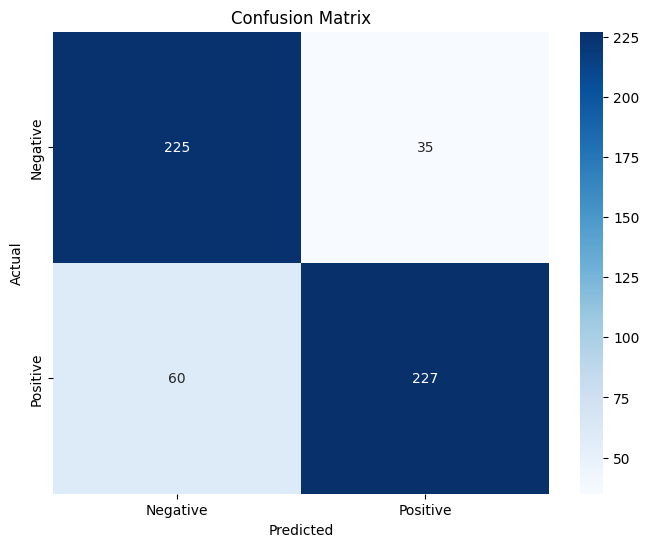

In [63]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize a TF-IDF vectorizer
tfidf_vect = TfidfVectorizer()
X = tfidf_vect.fit_transform(df.sentence)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df.label, test_size=0.2, random_state=42)

# Train the classifier on the training data
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predict labels for the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["Negative", "Positive"])

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



An accuracy of 0.83 suggests that the TF-IDF classifier is performing reasonably well. The similar precision, recall, and F1-score for both "Negative" and "Positive" classes indicate that the classifier is balanced in its predictions for both classes. 


In summary, the TF-IDF classifier demonstrates better performance in terms of accuracy and F1-score when compared to the Word-Frequency classifier. It is better at correctly predicting both positive and negative labels in the dataset.

# Part 4
Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

599
480
category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

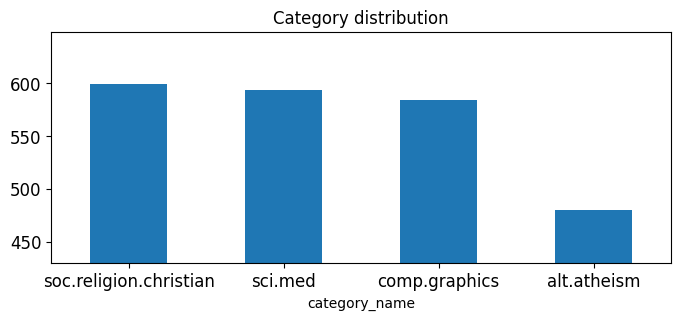

In [66]:
# In the Visualizatoin part, since the distribution of item in each category is relative unifrom.

# I will set the lower_bound = min(X_sample.category_name.value_counts() - 50) to make it more meaningful.

import pandas as pd
from sklearn.datasets import fetch_20newsgroups

def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs.data:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

def format_labels(target, docs):
    """ format the labels """
    return docs.target_names[target]

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# construct dataframe from a list
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

X = pd.DataFrame.from_records(format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: format_labels(t, twenty_train))

# plot barchart for X_sample
print(max(X.category.value_counts()))
print(min(X.category.value_counts()))
upper_bound = max(X.category.value_counts() + 50) 
lower_bound = min(X.category.value_counts() - 50) 
print(X.category_name.value_counts())

X.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [lower_bound, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))


In [68]:
# In the Duplicate Data Section. 

# Even though the data is duplicated, I believe it can still be subject to further analysis. 
# Therefore, I will remove the duplicate portions and retain one entry of the data.
X.drop_duplicates(keep='first', inplace=True) # inplace applies changes directly on our dataframe

2257
0
2257
